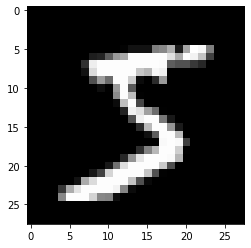

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edf
import mnist_loader

train_images, train_labels = mnist_loader.load_mnist(section = 'training', path = 'MNIST')
test_images, test_labels = mnist_loader.load_mnist(section = 'testing', path = 'MNIST')

plt.imshow(train_images[0], cmap='gray', interpolation = 'nearest')
plt.show()

In [2]:
"""for debuggin purposes it is useful to
make the computation deterministic"""

np.random.seed(1234)

# Now we build a model with random parameters

x = edf.Input((28*28,))
y = edf.Input((1,))
    
W1 = edf.Parameter(np.random.randn(20,28*28)*.1)
W2 = edf.Parameter(np.random.randn(10,20)*.1)
    
L1 = edf.Sigmoid(edf.Norm(edf.VDot(W1,x)))
L2 = edf.Softmax(edf.Norm(edf.VDot(W2,L1)))
M = edf.Model(edf.NegLog(edf.Aref(L2,y)))
    
"""the following is needed by the learning code below to set
the inputs (input and label are both "inputs" to the model)"""
    
M.x = x
M.y = y

In [3]:
"""the verify procedure does backpropagation and numerical
differentiation and compares to the two. This is important
for debugging componets.  When writing a new component
one should verify a stub model that uses just that component.
Discrepencies between backprop and numerical differntiation
can be due to bugs, numerical precision issues, or nonlinearities
in the model.  It is good to have your stub model is
operating in a numerically stable regime.  Beware of sigmoids causing
vanishing gradients."""

x.value = np.random.rand(28*28)
y.value = np.zeros(1,np.int64)

edf.verify(M)

 
component  15 <class 'edf.NegLog'>
users: []
value: 
[2.32204609]
backprop gradient: 
[1.]
numerical gradient:
[1.]
 
component  14 <class 'edf.Aref'>
users: [15]
value: 
[0.09807271]
backprop gradient: 
[-10.196516]
numerical gradient:
[-10.1448822]
 
component  13 <class 'edf.Input'>
users: [14]
value: 
[0]
backprop gradient: 
[0.]
numerical gradient:
[0.]
 
component  12 <class 'edf.Softmax'>
users: [14]
value: 
[0.09807271 0.09937931 0.09894464 0.09655241 0.1003067  0.10314748
 0.10013606 0.09768403 0.10556771 0.10020893]
backprop gradient: 
[-10.196516   0.         0.         0.         0.         0.
   0.         0.         0.         0.      ]
numerical gradient:
[-10.1448822   0.          0.          0.          0.          0.
   0.          0.          0.          0.       ]
 
component  11 <class 'edf.Norm'>
users: [12]
value: 
[-0.01757155 -0.00433681 -0.00872022 -0.03319472  0.00495174  0.03287911
  0.00324918 -0.02154265  0.05607181  0.00397661]
backprop gradient: 
[-0.9

numerical gradient:
[-1.54019942e-04  1.31961010e-04 -9.95498577e-05  1.23798567e-04
  1.88196567e-04  9.55743005e-05 -5.72608769e-05  2.06900991e-04
  1.44049733e-04  3.26121953e-04 -3.43583026e-04  1.02710201e-04
 -4.36754566e-05  2.47631714e-04 -1.23623092e-04  2.81541328e-05
 -1.93547999e-04 -2.14606720e-04 -1.93399484e-04  1.70347334e-04
 -9.11019584e-05 -1.63438321e-04 -1.02784383e-04 -3.15733863e-04
 -9.47647236e-05 -8.00914712e-06  1.07119205e-04  2.70639271e-05
  1.77386699e-04 -1.79169124e-05  1.04472239e-04 -4.06215706e-05
  2.61715248e-04  1.38168009e-04 -1.92515201e-04  8.67088299e-05
 -9.27442199e-05  2.33253901e-05 -7.39796406e-05 -6.36358122e-05
 -1.15048330e-04 -1.59766812e-04  1.05437028e-04 -2.35240272e-06
  1.70282850e-05  1.40377862e-04 -2.49403163e-04 -4.89790080e-05
 -9.90910478e-05 -1.18765033e-04 -1.20625750e-04 -1.64998785e-04
  6.69332136e-05  1.87089931e-04  5.20010444e-05  3.65428621e-06
  2.14195177e-04  3.34446626e-04  3.81279848e-05 -5.42815926e-06
  3.9

numerical gradient:
[[-8.27442523e-05 -3.26920898e-04 -2.60401018e-04 ... -1.14381760e-04
  -9.24788703e-05 -3.29354552e-04]
 [-7.67743118e-05 -3.05206232e-04 -2.43559873e-04 ... -1.07030197e-04
  -8.66074745e-05 -3.07853621e-04]
 [ 8.53100568e-06  3.38706583e-05  2.70289475e-05 ...  1.19096231e-05
   9.62905577e-06  3.42085209e-05]
 ...
 [-9.75999281e-06 -3.89423453e-05 -3.10367616e-05 ... -1.36639886e-05
  -1.10287917e-05 -3.93327442e-05]
 [ 9.12621467e-05  3.61002513e-04  2.87723043e-04 ...  1.26777959e-04
   1.02501328e-04  3.64149485e-04]
 [-3.60398067e-05 -1.42745890e-04 -1.13772716e-04 ... -4.99963981e-05
  -4.04564497e-05 -1.43805884e-04]]
 
component  0 <class 'edf.Parameter'>
users: [8]
value: 
[[ 0.0971657   0.09005215  0.02901115 -0.12761896 -0.21408839  0.17648924
  -0.01707227 -0.19450955 -0.11147924 -0.22122015  0.12057591  0.0549173
  -0.00958023  0.00191248 -0.05234554  0.09604604  0.01468451  0.04822097
  -0.15676517  0.00272777]
 [-0.03073833  0.01340928  0.17636512 

In [4]:
"""the following functions are used to train and evaluate the
network. training is done by iterating over all training samples
and updating the model's parameters with gradient descent."""

def train(M, nepochs):
    train_loss_curve = []
    train_err_curve = []
    test_loss_curve = []
    test_err_curve = []
    for epoch in range(nepochs):
        print("Epoch: {}/{}".format(epoch+1, nepochs))
        train_an_epoch(M)
        train_loss, train_err = evaluate(M, train_images, train_labels)
        train_loss_curve.append(train_loss)
        train_err_curve.append(100*train_err)
        print ("\t Training: Loss {:.3f} Error {:.2f}".format(train_loss, train_err))
        test_loss, test_err = evaluate(M, test_images, test_labels)
        test_loss_curve.append(test_loss)
        test_err_curve.append(100*test_err)
        print ("\t Test: Loss {:.3f} Error {:.2f}".format(test_loss, test_err))
    return train_loss_curve, train_err_curve, test_loss_curve, test_err_curve

def train_an_epoch(M):
    numsamples = train_images.shape[0]
    for i in range(numsamples):
        M.x.value = train_images[i].reshape((28*28,))
        M.y.value = [train_labels[i]]
        M.backprop()
        if i%20000 == 0:
            print ("\t Batch {}/{}".format(i, numsamples))

def evaluate(M, data, labels):
    total_loss = 0.0
    total_mistakes = 0.0
    numsamples = data.shape[0]
    for i in range(numsamples):
        M.x.value = data[i].reshape((28*28,))
        M.y.value = [labels[i]]
        M.forward()
        total_loss = total_loss + np.mean(M.loss.value)
        total_mistakes = total_mistakes + int(np.argmax(L2.value) != labels[i])
    return total_loss/numsamples, total_mistakes/numsamples

In [5]:
"""now, we are ready to train a network on MNIST. the following will
iterate over the training dataset a total of 10 times (10 epochs)."""

train_loss_curve, train_err_curve, test_loss_curve, test_err_curve = train(M,10)

Epoch: 1/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.376 Error 0.12
	 Test: Loss 0.363 Error 0.11
Epoch: 2/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.253 Error 0.08
	 Test: Loss 0.255 Error 0.08
Epoch: 3/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.211 Error 0.07
	 Test: Loss 0.218 Error 0.07
Epoch: 4/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.183 Error 0.06
	 Test: Loss 0.194 Error 0.06
Epoch: 5/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.166 Error 0.05
	 Test: Loss 0.182 Error 0.05
Epoch: 6/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.155 Error 0.05
	 Test: Loss 0.175 Error 0.05
Epoch: 7/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.146 Error 0.05
	 Test: Loss 0.169 Error 0.05
Epoch: 8/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Traini

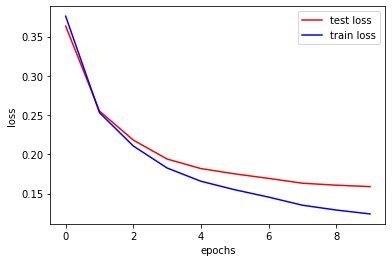

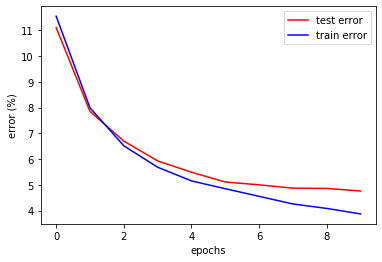

<Figure size 432x288 with 0 Axes>

In [6]:
"""we can then plot the loss and error curves on the training and test data."""

plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss_curve)), test_loss_curve, color='red')
plt.plot(np.arange(len(train_loss_curve)), train_loss_curve, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()
plt.clf()

plt.xlabel("epochs")
plt.ylabel("error (%)")
plt.plot(np.arange(len(test_err_curve)), test_err_curve, color='red')
plt.plot(np.arange(len(train_err_curve)), train_err_curve, color='blue')
plt.legend(['test error', 'train error'], loc='upper right')
plt.show()
plt.clf()

In [7]:
"""next, you have to implement a ReLU activation function ReLU(x) = max(0,x).
implement the forward and backward methods of the following class. use the
provided EDF source code to understand what each method should do. note that
since ReLU has no parameters, it might be helpful to base your implementation
on how the Sigmoid EDF Component is implemented."""

class ReLU(edf.Component):
    """for y = ReLU(x) we have that y has the same shape
    as x where y[i1,...,ik] = relu(x[i1,...ik]),
    where relu(z) = max(0,z)"""
    def __init__(self,x):
        self.value = np.empty(x.shape,np.float32)
        self.x = x
        edf.Component.__init__(self)
        edf.input_of(x,self)
        
    def forward(self):
        np.maximum(self.x.value, 0, self.value)

    def backward(self):
        np.add(self.grad * np.greater(self.x.value, 0).astype(float), 
               self.x.grad, self.x.grad)

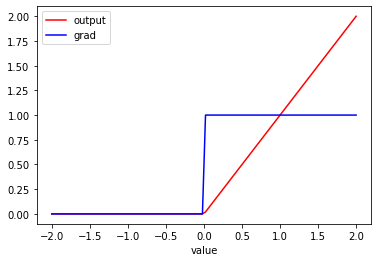

<Figure size 432x288 with 0 Axes>

In [8]:
"""the code below will plot the output and gradients computed by your
implementation of the ReLU component above. check if the plots match
ReLU(x) and dReLU/dx(x) as a sanity test of your implementation."""

x = edf.Input((1,))
y = edf.Input((1,))
relu = ReLU(x)
M = edf.Model(relu)
M.x = x
M.y = y

outputs = []
grads = []
values = np.linspace(-2,2,100)

for v in values:
    M.x.value = [v]
    M.y.value = [1]
    M.backprop()
    outputs.append(relu.value[0])
    grads.append(relu.x.grad[0])

plt.xlabel("value")
plt.plot(values, outputs, color='red')
plt.plot(values, grads, color='blue')
plt.legend(['output', 'grad'], loc='upper left')
plt.show()
plt.clf()

In [9]:
"""now, train the same network as before but with a ReLU activation
in the hidden layer instead of a Sigmoid."""

np.random.seed(1234)

x = edf.Input((28*28,))
y = edf.Input((1,))
    
W1 = edf.Parameter(np.random.randn(20,28*28)*.1)
W2 = edf.Parameter(np.random.randn(10,20)*.1)
    
L1 = ReLU(edf.Norm(edf.VDot(W1,x)))
L2 = edf.Softmax(edf.Norm(edf.VDot(W2,L1)))
M = edf.Model(edf.NegLog(edf.Aref(L2,y)))
  
M.x = x
M.y = y

x.value = np.random.rand(28*28)
y.value = np.zeros(1,np.int64)

In [10]:
train_loss_curve, train_err_curve, test_loss_curve, test_err_curve = train(M,10)

Epoch: 1/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.321 Error 0.10
	 Test: Loss 0.323 Error 0.09
Epoch: 2/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.284 Error 0.09
	 Test: Loss 0.297 Error 0.09
Epoch: 3/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.261 Error 0.08
	 Test: Loss 0.275 Error 0.08
Epoch: 4/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.257 Error 0.08
	 Test: Loss 0.272 Error 0.08
Epoch: 5/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.241 Error 0.07
	 Test: Loss 0.253 Error 0.08
Epoch: 6/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.225 Error 0.07
	 Test: Loss 0.238 Error 0.07
Epoch: 7/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.211 Error 0.06
	 Test: Loss 0.227 Error 0.07
Epoch: 8/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Traini

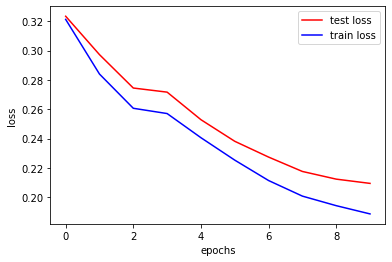

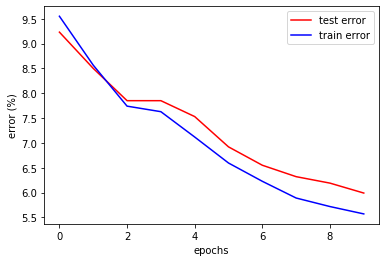

<Figure size 432x288 with 0 Axes>

In [11]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss_curve)), test_loss_curve, color='red')
plt.plot(np.arange(len(train_loss_curve)), train_loss_curve, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()
plt.clf()

plt.xlabel("epochs")
plt.ylabel("error (%)")
plt.plot(np.arange(len(test_err_curve)), test_err_curve, color='red')
plt.plot(np.arange(len(train_err_curve)), train_err_curve, color='blue')
plt.legend(['test error', 'train error'], loc='upper right')
plt.show()
plt.clf()

In [12]:
"""finally, implement the Tanh activation function by filling the missing
code in the forward and backward methods below. it might be helpful to derive
a relationship between Tanh and Sigmoid so that you can re-use parts of 
EDF's Sigmoid code."""

class Tanh(edf.Component):
    """for y = ReLU(x) we have that y has the same shape
    as x where y[i1,...,ik] = tanh(x[i1,...ik]),
    where tanh(z) = (e^z - e^-z)/(e^z + e^-z)"""
    def __init__(self,x):
        self.value = np.empty(x.shape,np.float32)
        self.x = x
        edf.Component.__init__(self)
        edf.input_of(x,self)
        self.exp = np.empty(self.shape)
        self.negexp = np.empty(self.shape)
        
    def forward(self):
        np.exp(self.x.value, self.exp)
        np.exp(np.negative(self.x.value), self.negexp)
        np.divide(np.subtract(self.exp, self.negexp),
                 np.add(self.exp, self.negexp),
                 self.value)

    def backward(self):
        np.add(self.grad * 
               4 / (np.square(self.exp) + np.square(self.negexp) + 2),
              self.x.grad,
              self.x.grad)

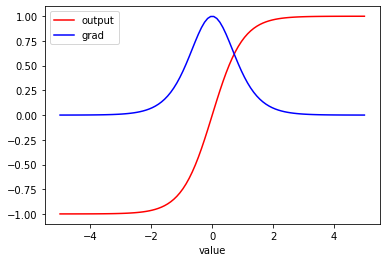

<Figure size 432x288 with 0 Axes>

In [13]:
"""again, make sure that the output and gradients plotted below are correct."""

x = edf.Input((1,))
y = edf.Input((1,))
tanh = Tanh(x)
M = edf.Model(tanh)
M.x = x
M.y = y

outputs = []
grads = []
values = np.linspace(-5,5,100)

for v in values:
    M.x.value = [v]
    M.y.value = [1]
    M.backprop()
    outputs.append(tanh.value[0])
    grads.append(tanh.x.grad[0])

plt.xlabel("value")
plt.plot(values, outputs, color='red')
plt.plot(values, grads, color='blue')
plt.legend(['output', 'grad'], loc='upper left')
plt.show()
plt.clf()

In [14]:
"""you can then train a network with a Tanh activation function instead
of Sigmoid/ReLU."""

np.random.seed(1234)

x = edf.Input((28*28,))
y = edf.Input((1,))
    
W1 = edf.Parameter(np.random.randn(20,28*28)*.1)
W2 = edf.Parameter(np.random.randn(10,20)*.1)
    
L1 = Tanh(edf.Norm(edf.VDot(W1,x)))
L2 = edf.Softmax(edf.Norm(edf.VDot(W2,L1)))
M = edf.Model(edf.NegLog(edf.Aref(L2,y)))
  
M.x = x
M.y = y

x.value = np.random.rand(28*28)
y.value = np.zeros(1,np.int64)

In [15]:
train_loss_curve, train_err_curve, test_loss_curve, test_err_curve = train(M,10)

Epoch: 1/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.276 Error 0.08
	 Test: Loss 0.271 Error 0.08
Epoch: 2/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.211 Error 0.06
	 Test: Loss 0.215 Error 0.07
Epoch: 3/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.189 Error 0.06
	 Test: Loss 0.203 Error 0.06
Epoch: 4/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.176 Error 0.06
	 Test: Loss 0.195 Error 0.06
Epoch: 5/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.161 Error 0.05
	 Test: Loss 0.187 Error 0.06
Epoch: 6/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.147 Error 0.05
	 Test: Loss 0.179 Error 0.05
Epoch: 7/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Training: Loss 0.137 Error 0.04
	 Test: Loss 0.174 Error 0.05
Epoch: 8/10
	 Batch 0/60000
	 Batch 20000/60000
	 Batch 40000/60000
	 Traini

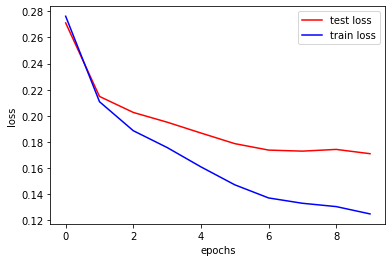

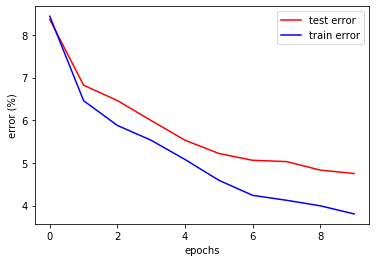

<Figure size 432x288 with 0 Axes>

In [16]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(len(test_loss_curve)), test_loss_curve, color='red')
plt.plot(np.arange(len(train_loss_curve)), train_loss_curve, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()
plt.clf()

plt.xlabel("epochs")
plt.ylabel("error (%)")
plt.plot(np.arange(len(test_err_curve)), test_err_curve, color='red')
plt.plot(np.arange(len(train_err_curve)), train_err_curve, color='blue')
plt.legend(['test error', 'train error'], loc='upper right')
plt.show()
plt.clf()